In [1]:
import torch
import time

def benchmark_throughput(model, input_size, num_iterations=100):
    # Create random input tensor
    input_tensor = torch.randn(*input_size)

    # Move model and input tensor to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    input_tensor = input_tensor.to(device)

    # Warm-up run
    with torch.no_grad():
        model(input_tensor)

    # Start benchmarking
    start_time = time.time()
    for _ in range(num_iterations):
        with torch.no_grad():
            model(input_tensor)
    end_time = time.time()

    # Calculate throughput
    elapsed_time = end_time - start_time
    throughput = num_iterations / elapsed_time

    return throughput

In [2]:
import pandas as pd
from const import (
   ANTIVAX,
   TWITTER16,
   TWITTER15,
   PHEME,
   FIGLANG_TWITTER,
   POLITIFACT,
) 



In [3]:
# dataset = TWITTER16 
# dataset = TWITTER15 
dataset = PHEME 
# dataset = FIGLANG_TWITTER
# dataset = POLITIFACT
# dataset = ANTIVAX

df = pd.read_csv(f'results/{dataset}.csv')
hs4_df = df.loc[df['model'] == 'hs4']
bert_df = df.loc[df['model'] == 'bert']
han_df = df.loc[df['model'] == 'han']
hyphen_df = df.loc[df['model'] == 'hyphen']
df =bert_df 
for i in range(0, len(df)):
   model = df.iloc[i]['model']
   manifold = df.iloc[i]['manifold']
   fourier = df.iloc[i]['fourier']
   f1 = df.iloc[i]['f1']
   prec = df.iloc[i]['prec']
   rec = df.iloc[i]['rec']
   train_time = df.iloc[i]['train time']
   print(fourier) 
   print(manifold)
   print(f'{prec:.3f} & {rec:.3f} & {f1:.3f} & {train_time:.2f}')
   print('-----------------')

True
lorentz
0.617 & 0.561 & 0.544 & 35.76
-----------------


In [4]:
import wandb
import matplotlib.pyplot as plt

# Step 1: Initialize wandb and retrieve data
api = wandb.Api()
entity, project = 'eddiechen372', dataset 
runs = api.runs(f"{entity}/{project}")


In [5]:
# from tqdm.auto import tqdm
# import seaborn as sns
# import pandas as pd

# df = pd.DataFrame()
# for run in tqdm(runs):
#    run = api.run(f"{entity}/{project}/{run.id}")
#    config = run.config
#    history = run.scan_history(keys=['best F1', 'epoch'])
#    type = config['type']
#    manifold = config['manifold']
#    for i,row in enumerate(history):
#       row = pd.DataFrame({'type': [type], 'manifold': [manifold], 'epoch': [row['epoch']], 'best F1': [row['best F1']]})
#       df = pd.concat([df, row])


In [6]:
# df = df[df['type'] == 'hs4']
# sns.set_theme(style="darkgrid")
# sns.lineplot(data=df, x="epoch", y="best F1", hue="manifold", style="manifold")

In [7]:
import torch
from const import (
   LORENTZ, 
   POINCARE, 
   EUCLID, 
   HAN, 
   HYPHEN, 
   HS4, 
   BERT,
   TWITTER16,
   TWITTER15, 
   PHEME,
   POLITIFACT,
   FIGLANG_TWITTER,
   ANTIVAX,
)
from torch.profiler import profile, record_function, ProfilerActivity
from trainer import Trainer 





/home/jupyter-iec_chau/miniconda3/envs/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jupyter-iec_chau/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/jupyter-iec_chau/.local/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/jupyter-iec_chau/.local/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree

In [8]:
import os
from const import (DATA_PATH)
import pickle
file = open(f'{DATA_PATH}/data/{dataset}/{dataset}_preprocessed.pkl', 'rb')
df = pd.read_csv(f'data/{dataset}/{dataset}.csv') 
props = pickle.load(file)

id_train, id_test = props['train']['id'], props['val']['id']
raw_c_train, raw_c_val = list(df[df['id'].isin(id_train)]['comments']), list(df[df['id'].isin(id_test)]['comments'])
raw_c_train = [c.split('::') if isinstance(c, str) else '' for c in raw_c_train]
raw_c_val= [c.split('::') if isinstance(c, str) else '' for c in raw_c_val]
x_train, x_val = props['train']['x'], props['val']['x']
y_train, y_val = props['train']['y'], props['val']['y']
c_train, c_val = props['train']['c'], props['val']['c']
sub_train, sub_val = props['train']['subgraphs'], props['val']['subgraphs']

os.environ['CUDA_VISIBLE_DEVICES'] = '1' 
hs4_trainer = Trainer(
    manifold=EUCLID,
    model_type=HS4,
    platform=TWITTER16, 
    max_sen_len=30, 
    max_com_len=30, 
    max_sents=20, 
    max_coms=20, 
    lr = 1e-3, 
    fourier = False,
    curv=1.0,
    enable_log=False,
    embedding_dim=200
)
bert_trainer = Trainer(
    manifold=POINCARE,
    model_type=BERT,
    platform=EUCLID, 
    max_sen_len=30, 
    max_com_len=30, 
    max_sents=20, 
    max_coms=20, 
    lr = 1e-3, 
    fourier = False,
    curv=1.0,
    enable_log=False,
    embedding_dim=200
)
rnn_trainer = Trainer(
    manifold=EUCLID,
    model_type=HAN,
    platform=TWITTER16, 
    max_sen_len=30, 
    max_com_len=30, 
    max_sents=20, 
    max_coms=20, 
    lr = 1e-3, 
    fourier = False,
    curv=1.0,
    enable_log=False,
    embedding_dim=200
)

rnn_trainer.build_model(32)
bert_trainer.build_model(32)
hs4_trainer.build_model(32)

using manifold  euclid
using fourier False
using manifold  poincare
using fourier False
using manifold  euclid
using fourier False
saved tokenizer
Building model....
building HypPostEnc
building HypComEnc
building CoAttention
han built
saved tokenizer
Building model....
building HypPostEnc
building HypComEnc
building CoAttention
bert built
saved tokenizer
Building model....
building HypPostEnc
building HypComEnc
building CoAttention
hs4 built


In [9]:
bert= bert_trainer.model
han = rnn_trainer.model
hs4= hs4_trainer.model
total_params = sum(p.numel() for p in bert.parameters())
print(f"Total parameters: {total_params}")
total_params = sum(p.numel() for p in han.parameters())
print(f"Total parameters: {total_params}")
total_params = sum(p.numel() for p in hs4.parameters())
print(f"Total parameters: {total_params}")

Total parameters: 42212061
Total parameters: 13188060
Total parameters: 12604460


  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [00:11<00:00,  8.65it/s]


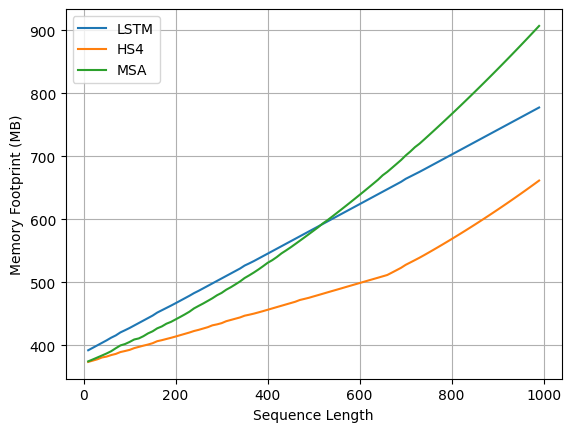

In [20]:
import torch
import matplotlib.pyplot as plt
from tqdm.auto import tqdm 

# Assume model is already defined

def measure_memory_footprint(model, comment_input_size, content_input_size):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device).eval()
    start = time.time()
    
    # Measure memory before inference
    torch.cuda.reset_peak_memory_stats(device)
    with torch.no_grad():
        input_tensor = torch.randint(0, 100, size=comment_input_size).to(device)
        model(content=input_tensor, comment=input_tensor)
    inference_time = time.time() - start 
    
    # Measure memory after inference
    memory_footprint = torch.cuda.max_memory_allocated(device) / (1024 ** 2)  # Convert to MB
    return memory_footprint, inference_time

sequence_lengths = range(10, 1000, 10)  

for i, model in enumerate([han, hs4, bert]):
    memory_footprints = []
    infernce_times = []
    for seq_len in tqdm(sequence_lengths):
        input_size = (32, seq_len, 10)  # Example input size, adjust based on your model
        footprint, infernce_time = measure_memory_footprint(model, input_size, input_size)
        infernce_times.append(infernce_time)
        memory_footprints.append(footprint)

    plt.plot(sequence_lengths, memory_footprints )
    # plt.plot(sequence_lengths, infernce_times)
    plt.xlabel('Sequence Length')
    plt.ylabel('Memory Footprint (MB)')
    # plt.ylabel('Inference time (second)')
    plt.grid(True)

plt.legend(['LSTM', 'HS4', 'MSA'])
# plt.title('')
plt.show()

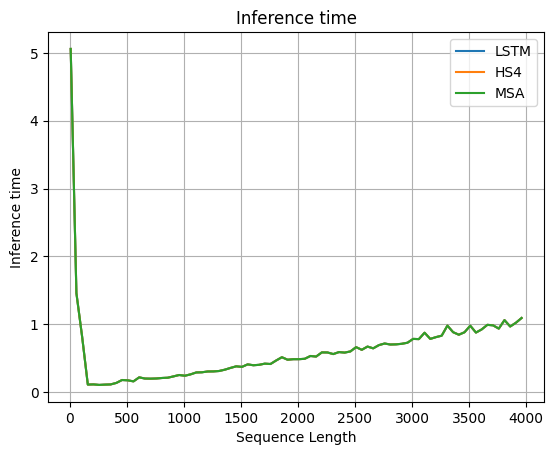

In [12]:

for i, model in enumerate([han, hs4, bert]):
    # plt.plot(sequence_lengths, memory_footprints )
    plt.plot(sequence_lengths, infernce_times)
    plt.xlabel('Sequence Length')
    # plt.ylabel('Memory Footprint (MB)')
    plt.ylabel('Inference time')
    plt.grid(True)

plt.legend(['LSTM', 'HS4', 'MSA'])
plt.title('Inference time')
plt.show()

100%|██████████| 16/16 [02:04<00:00,  7.80s/it]


<Axes: xlabel='epoch', ylabel='best F1'>

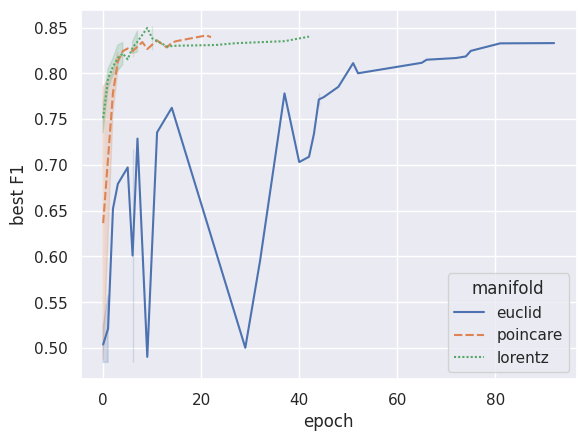

In [ ]:
from tqdm.auto import tqdm
import seaborn as sns
import pandas as pd

df = pd.DataFrame()
for run in tqdm(runs):
   run = api.run(f"{entity}/{project}/{run.id}")
   config = run.config
   history = run.scan_history(keys=['best F1', 'epoch'])
   type = config['type']
   manifold = config['manifold']
   for i,row in enumerate(history):
      row = pd.DataFrame({'type': [type], 'manifold': [manifold], 'epoch': [row['epoch']], 'best F1': [row['best F1']]})
      df = pd.concat([df, row])


df = df[df['type'] == 'hs4']
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="epoch", y="best F1", hue="manifold", style="manifold")
